In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from statistics import mean, stdev
from math import sqrt

%matplotlib inline

In [187]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df2 = pd.read_csv('noc_regions.csv')

In [5]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df = df.merge(df2, on = 'NOC')

In [7]:
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
region        21
notes     265728
dtype: int64

In [8]:
new_df = df.dropna(subset = ['Age', 'Height', 'Weight'])
new_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
6,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NaN,China,NaN
7,3605,An Weijiang,M,22.0,178.0,72.0,China,CHN,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NaN,China,NaN
8,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,Silver,China,NaN
9,3610,An Yulong,M,19.0,173.0,70.0,China,CHN,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",NaN,China,NaN


In [ ]:
new_df['region'].value_counts()

In [ ]:
new_df['Sex'].value_counts()

In [ ]:
new_df[new_df['region'] == 'Ghana']

In [ ]:
new_df[new_df['region'] == 'Ghana']['Sport'].value_counts()

In [ ]:
new_df.isna().sum()

In [ ]:
new_df[new_df['region'] == 'Switzerland']

In [ ]:
new_df['Sport'].value_counts()

In [ ]:
new_df[new_df['Sport'] == 'Shooting']

In [ ]:
new_df[new_df['Sport'] == 'Shooting']['Medal'].value_counts()

In [ ]:
new_df[new_df['Sport'] == 'Shooting']['Sex'].value_counts()

In [ ]:
men = new_df[(new_df['Sport'] == 'Shooting') & (new_df['Sex'] == 'M') & (new_df['Team'] == 'China')]
men

In [ ]:
men['Medal'].value_counts()

In [ ]:
men['Age'].value_counts()

In [ ]:
women_shooting = new_df[(new_df['Sport'] == 'Shooting') & (new_df['Sex'] == 'F')]
women_shooting

In [ ]:
women_shooting.describe()

In [ ]:
women_shooting['Medal'].value_counts()

In [ ]:
women_shooting['Team'].value_counts()

In [ ]:
women_shooting[women_shooting['Age'] == 16]

In [ ]:
women_shooting[women_shooting['Age'] == 57]

In [ ]:
women_shooting[women_shooting['Weight'] == 117]

In [ ]:
women_shooting['Year'].value_counts().sort_index()

In [ ]:
women_shooting['Year'].value_counts().sort_index().plot()

In [ ]:
gold_shooting = women_shooting[women_shooting['Medal'] == 'Gold']
gold_shooting

In [ ]:
gold_shooting['region'].value_counts()

In [ ]:
silver_shooting = women_shooting[women_shooting['Medal'] == 'Silver']
silver_shooting

In [ ]:
silver_shooting['region'].value_counts()

In [ ]:
bronze_shooting = women_shooting[women_shooting['Medal'] == 'Bronze']
bronze_shooting

In [ ]:
bronze_shooting['region'].value_counts()

In [9]:
gold_medals = new_df[new_df['Medal'] == 'Gold']
gold_medals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
68,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China,NaN
77,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China,NaN
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN
104,18005,Cao Yuan,M,17.0,160.0,42.0,China,CHN,2012 Summer,2012,Summer,London,Diving,Diving Men's Synchronized Platform,Gold,China,NaN
105,18005,Cao Yuan,M,21.0,160.0,42.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Springboard,Gold,China,NaN
125,20150,Chen Aisen,M,20.0,168.0,60.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Platform,Gold,China,NaN
126,20150,Chen Aisen,M,20.0,168.0,60.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Men's Synchronized Platform,Gold,China,NaN
141,20182,Chen Ding,M,19.0,175.0,62.0,China,CHN,2012 Summer,2012,Summer,London,Athletics,Athletics Men's 20 kilometres Walk,Gold,China,NaN
180,20217,Chen Jing,F,19.0,170.0,60.0,China,CHN,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN
186,20220,Chen Jing,F,28.0,182.0,75.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN


In [ ]:
gold_medals['region'].value_counts()

In [ ]:
gold_medals_2000 = gold_medals[(gold_medals['Medal'] == 'Gold') & (gold_medals['Year']>= 2000)]
gold_medals_2000.head()

In [ ]:
gold_medals_2000['region'].value_counts()

In [ ]:
USA_top_sports = gold_medals_2000[gold_medals_2000['region'] == 'USA']
USA_top_sports.head()

In [ ]:
USA_top_sports['Event'].value_counts()

In [ ]:
Germany_all_time = gold_medals[gold_medals['region'] == 'Germany']
Germany_all_time.head()

In [ ]:
Germany_all_time['Event'].value_counts()

In [ ]:
Germany_top_sports = gold_medals_2000[gold_medals_2000['region'] == 'Germany']
Germany_top_sports

In [ ]:
Germany_top_sports['Event'].value_counts()

In [79]:
all_women_gold = gold_medals[gold_medals['Sex'] == 'F']
all_women_gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN
180,20217,Chen Jing,F,19.0,170.0,60.0,China,CHN,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN
186,20220,Chen Jing,F,28.0,182.0,75.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN
234,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Gold,China,NaN
235,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Synchronized Platform,Gold,China,NaN


In [ ]:
all_women_gold['region'].value_counts()

In [ ]:
women_diff = all_women_gold['region'].value_counts() - all_women_gold[(all_women['Year'] >=2000)]['region'].value_counts()
women_diff

In [ ]:
women_diff.sort_values()

In [ ]:
all_women_gold['Event'].value_counts()

In [ ]:
all_women_gold['Year'].value_counts().sort_index()

In [ ]:
all_women_gold['Year'].value_counts().sort_index().plot()

In [ ]:
all_women_gold['Season'].value_counts()

In [11]:
summer_all_women_gold = all_women_gold[all_women_gold['Season'] == 'Summer']

In [ ]:
summer_all_women_gold['Year'].value_counts().sort_index()

In [ ]:
summer_all_women_gold['Year'].value_counts().sort_index().plot()

In [13]:
all_women = new_df[new_df['Sex'] == 'F'].copy()

In [ ]:
all_women['Year'].value_counts().sort_index().plot()

In [ ]:
summer_all_women = all_women[all_women['Season'] == 'Summer']

In [ ]:
summer_all_women['Year'].value_counts().sort_index().plot()

In [ ]:
summer_all_women_gold['Age'].value_counts().sort_index().plot()

In [ ]:
all_women['Age'].value_counts().sort_index().plot()

In [14]:
all_women['Weight(lb)'] = all_women['Weight'].map(lambda x: x*2.2)

In [15]:
all_women['Height(in)'] = all_women['Height'].map(lambda x: x/2.54)
all_women['Height(in)'] = all_women['Height(in)'].round(1)

In [16]:
all_women['Height(m)'] = all_women['Height'].map(lambda x: x/100)

In [17]:
all_women['BMI'] = (all_women['Weight']/(all_women['Height(m)']**2)).round(1)

In [18]:
all_women

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,118.8,66.1,1.68,19.1
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,118.8,66.1,1.68,19.1
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,...,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,143.0,66.9,1.70,22.5
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,...,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,143.0,66.9,1.70,22.5
17,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,...,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China,NaN,171.6,72.0,1.83,23.3
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,...,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,129.8,64.6,1.64,21.9
24,6851,Bai Jie,F,28.0,163.0,53.0,China,CHN,2000 Summer,2000,...,Sydney,Football,Football Women's Football,NaN,China,NaN,116.6,64.2,1.63,19.9
25,6853,Bai Lili,F,25.0,168.0,57.0,China,CHN,2004 Summer,2004,...,Athina,Football,Football Women's Football,NaN,China,NaN,125.4,66.1,1.68,20.2
26,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,NaN,101.2,65.4,1.66,16.7
28,6857,Bai Xue,F,19.0,165.0,53.0,China,CHN,2008 Summer,2008,...,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN,China,NaN,116.6,65.0,1.65,19.5


In [19]:
all_women_no_medal = all_women[(all_women['Medal'] != 'Gold') & 
                                (all_women['Medal'] != 'Silver') & 
                                (all_women['Medal'] != 'Bronze')]

In [ ]:
all_women_no_medal

In [75]:
all_women_all_medal = all_women[(all_women['Medal'] == 'Gold') | 
                                (all_women['Medal'] == 'Silver') | 
                                (all_women['Medal'] == 'Bronze')]

In [127]:
all_women_all_medal.groupby('Medal').mean()

,ID,Age,Height,Weight,Year,Weight(lb),Height(in),Height(m),BMI
Medal,,,,,,,,,
Bronze,71979.629213,24.804379,170.300202,63.034140,1995.932584,138.675108,67.046125,1.703002,21.637338
Gold,71512.013384,24.427699,170.743672,63.463486,1995.317428,139.619668,67.219727,1.707437,21.653011
Silver,71289.782533,24.554294,170.573217,63.172198,1995.652402,138.978836,67.153071,1.705732,21.600728


In [83]:
all_women_gold_medal = all_women[(all_women['Medal'] == 'Gold')]
all_women_gold_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,...,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,165.0,66.1,1.68,26.6
180,20217,Chen Jing,F,19.0,170.0,60.0,China,CHN,1988 Summer,1988,...,Seoul,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN,132.0,66.9,1.70,20.8
186,20220,Chen Jing,F,28.0,182.0,75.0,China,CHN,2004 Summer,2004,...,Athina,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN,165.0,71.7,1.82,22.6
234,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,...,Beijing,Diving,Diving Women's Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
235,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,...,Beijing,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
236,20258,Chen Ruolin,F,19.0,160.0,47.0,China,CHN,2012 Summer,2012,...,London,Diving,Diving Women's Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
237,20258,Chen Ruolin,F,19.0,160.0,47.0,China,CHN,2012 Summer,2012,...,London,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
238,20258,Chen Ruolin,F,23.0,160.0,47.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
256,20293,Chen Xiaomin,F,23.0,158.0,63.0,China,CHN,2000 Summer,2000,...,Sydney,Weightlifting,Weightlifting Women's Middleweight,Gold,China,NaN,138.6,62.2,1.58,25.2
258,20295,Chen Xiexia,F,25.0,152.0,49.0,China,CHN,2008 Summer,2008,...,Beijing,Weightlifting,Weightlifting Women's Flyweight,Gold,China,NaN,107.8,59.8,1.52,21.2


In [76]:
all_women_all_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,...,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,143.0,66.9,1.70,22.5
17,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,...,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China,NaN,171.6,72.0,1.83,23.3
33,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,...,Beijing,Fencing,"Fencing Women's Sabre, Team",Silver,China,NaN,147.4,67.7,1.72,22.6
41,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver,China,NaN,77.0,55.9,1.42,17.4
53,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,...,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China,NaN,138.6,68.5,1.74,20.8
63,17289,Cai Tongtong,F,18.0,168.0,48.0,China,CHN,2008 Summer,2008,...,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver,China,NaN,105.6,66.1,1.68,17.0
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,...,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,165.0,66.1,1.68,26.6
91,17996,Cao Mianying,F,29.0,176.0,71.0,China,CHN,1996 Summer,1996,...,Atlanta,Rowing,Rowing Women's Double Sculls,Silver,China,NaN,156.2,69.3,1.76,22.9
118,19779,Chang Si,F,25.0,170.0,56.0,China,CHN,2012 Summer,2012,...,London,Synchronized Swimming,Synchronized Swimming Women's Team,Silver,China,NaN,123.2,66.9,1.70,19.4
122,19815,Chao Na,F,16.0,178.0,69.0,China,CHN,1996 Summer,1996,...,Atlanta,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Silver,China,NaN,151.8,70.1,1.78,21.8


In [20]:
summer_all_women_no_medal = all_women_no_medal[all_women_no_medal['Season'] == 'Summer']
summer_all_women_no_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,118.8,66.1,1.68,19.1
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,118.8,66.1,1.68,19.1
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,...,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,143.0,66.9,1.70,22.5
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,...,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,129.8,64.6,1.64,21.9
24,6851,Bai Jie,F,28.0,163.0,53.0,China,CHN,2000 Summer,2000,...,Sydney,Football,Football Women's Football,NaN,China,NaN,116.6,64.2,1.63,19.9
25,6853,Bai Lili,F,25.0,168.0,57.0,China,CHN,2004 Summer,2004,...,Athina,Football,Football Women's Football,NaN,China,NaN,125.4,66.1,1.68,20.2
26,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,NaN,101.2,65.4,1.66,16.7
28,6857,Bai Xue,F,19.0,165.0,53.0,China,CHN,2008 Summer,2008,...,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN,China,NaN,116.6,65.0,1.65,19.5
32,7597,Bao Yingying,F,24.0,172.0,67.0,China,CHN,2008 Summer,2008,...,Beijing,Fencing,"Fencing Women's Sabre, Individual",NaN,China,NaN,147.4,67.7,1.72,22.6
34,7598,Bao Yuqing,F,22.0,173.0,55.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN,China,NaN,121.0,68.1,1.73,18.4


In [21]:
summer_all_women_gold = all_women[(all_women['Season'] == 'Summer') & (all_women['Medal'] == 'Gold')]
summer_all_women_gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
87,17995,Cao Lei,F,24.0,168.0,75.0,China,CHN,2008 Summer,2008,...,Beijing,Weightlifting,Weightlifting Women's Heavyweight,Gold,China,NaN,165.0,66.1,1.68,26.6
180,20217,Chen Jing,F,19.0,170.0,60.0,China,CHN,1988 Summer,1988,...,Seoul,Table Tennis,Table Tennis Women's Singles,Gold,China,NaN,132.0,66.9,1.70,20.8
186,20220,Chen Jing,F,28.0,182.0,75.0,China,CHN,2004 Summer,2004,...,Athina,Volleyball,Volleyball Women's Volleyball,Gold,China,NaN,165.0,71.7,1.82,22.6
234,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,...,Beijing,Diving,Diving Women's Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
235,20258,Chen Ruolin,F,15.0,160.0,47.0,China,CHN,2008 Summer,2008,...,Beijing,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
236,20258,Chen Ruolin,F,19.0,160.0,47.0,China,CHN,2012 Summer,2012,...,London,Diving,Diving Women's Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
237,20258,Chen Ruolin,F,19.0,160.0,47.0,China,CHN,2012 Summer,2012,...,London,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
238,20258,Chen Ruolin,F,23.0,160.0,47.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Diving,Diving Women's Synchronized Platform,Gold,China,NaN,103.4,63.0,1.60,18.4
256,20293,Chen Xiaomin,F,23.0,158.0,63.0,China,CHN,2000 Summer,2000,...,Sydney,Weightlifting,Weightlifting Women's Middleweight,Gold,China,NaN,138.6,62.2,1.58,25.2
258,20295,Chen Xiexia,F,25.0,152.0,49.0,China,CHN,2008 Summer,2008,...,Beijing,Weightlifting,Weightlifting Women's Flyweight,Gold,China,NaN,107.8,59.8,1.52,21.2


In [ ]:
summer_all_women.describe()

In [ ]:
summer_all_women_gold.describe()

In [ ]:
# Women participated in the 1900 Games in Paris, France. 
# Twenty-two women (2.2 per cent) out of a total of 997 athletes competed in five sports. 
# These sports were tennis, sailing, croquet, equestrian and golf.
# First gold medal won by a women was in 1920

In [ ]:
# Question 1: Is there a difference in BMI's of non-medal winners and gold medal winners?
# Null hypothesis: there is no difference in BMI's from non-medal winners and gold medal winners
# Alternative hypothesis: there is a difference in BMI's from non-medal winners and gold medal winners
# Test-statistic: T-test
# Alpha: .05

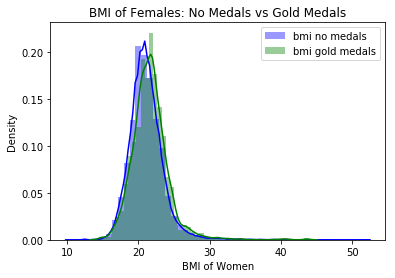

In [112]:
sns.distplot(all_women_no_medal['BMI'], color = 'blue', label = 'bmi no medals')
sns.distplot(all_women_gold_medal['BMI'], color = 'green', label = 'bmi gold medals')
plt.title("BMI of Females: No Medals vs Gold Medals")
plt.xlabel("BMI of Women")
plt.ylabel("Density")
plt.legend()
plt.savefig("bmi_females_no_gold_vs_gold")

In [97]:
BMI_avg_sample_all_women_no_medal = []

for i in range(1000):
    sample_no_medal = all_women_no_medal['BMI'].sample(n=500)
    mean_no_medal = sample_no_medal.mean()
    BMI_avg_sample_all_women_no_medal.append(mean_no_medal)
    
mean_BMI_summer_women_no_medal = np.mean(BMI_avg_sample_all_women_no_medal)
std_BMI_summer_women_no_medal = np.std(BMI_avg_sample_all_women_no_medal)

In [98]:
BMI_avg_sample_all_women_gold_medal = []

for i in range(1000):
    sample_gold_medal = all_women_gold_medal['BMI'].sample(n=500)
    mean_gold_medal = sample_gold_medal.mean()
    BMI_avg_sample_all_women_gold_medal.append(mean_gold_medal)
    
mean_BMI_summer_women_gold_medal = np.mean(BMI_avg_sample_all_women_gold_medal)
std_BMI_summer_women_gold_medal = np.std(BMI_avg_sample_all_women_gold_medal)

In [95]:
BMI_summer_no_medal_women = np.random.normal(mean_BMI_summer_women_no_medal, std_BMI_summer_women_no_medal, 1000)
BMI_summer_gold_medal = np.random.normal(mean_BMI_summer_women_gold_medal, std_BMI_summer_women_gold_medal, 1000)

In [100]:
BMI_avg_samp_all_women_no_medal = []
for i in range(1000):
    BMI_avg_samp_all_women_no_medal.append(np.random.choice(all_women_no_medal['BMI'], 500, replace=True))
    
BMI_avg_mean_all_women_no_medal = []
for i in BMI_avg_samp_all_women_no_medal:
    BMI_avg_mean_all_women_no_medal.append(np.mean(i))

In [129]:
BMI_avg_samp_all_women_gold_medal = []
for i in range(1000):
    BMI_avg_samp_all_women_gold_medal.append(np.random.choice(all_women_gold_medal['BMI'], 500, replace=True))
    
BMI_avg_mean_all_women_gold_medal = []
for i in BMI_avg_samp_all_women_gold_medal:
    BMI_avg_mean_all_women_gold_medal.append(np.mean(i))

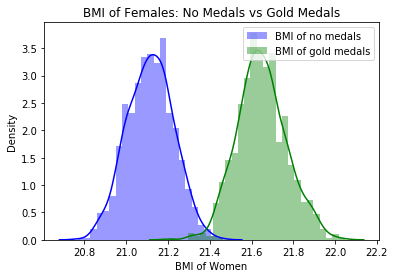

In [167]:
sns.distplot(BMI_avg_mean_all_women_no_medal, color = 'blue', label = 'BMI of no medals')
sns.distplot(BMI_avg_mean_all_women_gold_medal, color = 'green', label = 'BMI of gold medals')
plt.title("BMI of Females: No Medals vs Gold Medals")
plt.xlabel("BMI of Women")
plt.ylabel("Density")
plt.legend()
plt.savefig("BMI_females_no_gold_vs_gold") 

In [180]:
mean(all_women_gold_medal['BMI'])

21.653011347105032

In [181]:
mean(all_women_no_medal['BMI'])

21.112006257332812

In [131]:
test = stats.ttest_ind(BMI_avg_mean_all_women_no_medal, BMI_avg_mean_all_women_gold_medal, equal_var=False)
test

Ttest_indResult(statistic=-104.25931775341101, pvalue=0.0)

In [132]:
effect_size = (mean(all_women_gold_medal['BMI']) - mean(all_women_no_medal['BMI'])) / (sqrt((stdev(all_women_gold_medal['BMI']) ** 2 + stdev(all_women_no_medal['BMI']) ** 2) / 2))

print("Effect size:", effect_size)

Effect size: 0.21541011737080687


In [ ]:
# Conclusion: pvalue = 0.0, so we reject the null hypothesis. 
# There is a difference in the BMI's of female with no medals vs female with gold medals
# Cohen's d Test: we observed a small effect

In [33]:
all_women['Year'].value_counts().sort_index()

1920       1
1924       7
1928      56
1932      57
1936      88
1948     137
1952     417
1956     525
1960    1516
1964    1643
1968    2169
1972    2491
1976    2462
1980    2049
1984    2885
1988    4001
1992    4079
1994    1023
1996    4234
1998    1350
2000    5373
2002    1555
2004    5521
2006    1753
2008    5716
2010    1837
2012    5631
2014    1920
2016    6101
Name: Year, dtype: int64

In [ ]:
# Question 2: Did the difference in ages from 1996 Olympic participants ('Summer of Women') improve compared to 2016 Olympic participants?
# Null hypothesis: there is no difference in ages from 1996 participants and 2016 participants
# Alternative hypothesis: there is a difference in ages from 1996 participants and 2016 participants
# Test-statistic: T-test
# Alpha: .05

In [146]:
BMI_avg_samp_all_women_1996 = []
for i in range(1000):
    BMI_avg_samp_all_women_1996.append(np.random.choice(all_women_1996['Age'], 500, replace=True))
    
BMI_avg_mean_all_women_1996 = []
for i in BMI_avg_samp_all_women_1996:
    BMI_avg_mean_all_women_1996.append(np.mean(i))

In [147]:
BMI_avg_samp_all_women_2016 = []
for i in range(1000):
    BMI_avg_samp_all_women_2016.append(np.random.choice(all_women_2016['Age'], 500, replace=True))
    
BMI_avg_mean_all_women_2016 = []
for i in BMI_avg_samp_all_women_2016:
    BMI_avg_mean_all_women_2016.append(np.mean(i))

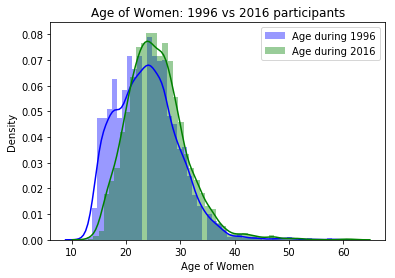

In [175]:
sns.distplot(all_women_1996['Age'], color = 'blue', label = 'Age during 1996')
sns.distplot(all_women_2016['Age'], color = 'green', label = 'Age during 2016')
plt.title("Age of Women: 1996 vs 2016 participants")
plt.xlabel("Age of Women")
plt.ylabel("Density")
plt.legend()
plt.savefig("Ages_of_women_1996_2016") 

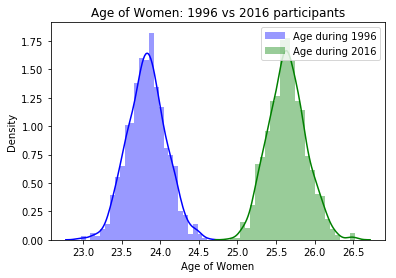

In [178]:
sns.distplot(BMI_avg_mean_all_women_1996, color = 'blue', label = 'Age during 1996')
sns.distplot(BMI_avg_mean_all_women_2016, color = 'green', label = 'Age during 2016')
plt.title("Age of Women: 1996 vs 2016 participants")
plt.xlabel("Age of Women")
plt.ylabel("Density")
plt.legend(loc = 'upper right')
plt.savefig("Ages_of_women_1996_2016") 

In [184]:
mean(all_women_1996['Age'])

23.81483230987246

In [183]:
mean(all_women_2016['Age'])

25.62006228487133

In [169]:
stats.ttest_ind(BMI_avg_mean_all_women_1996, BMI_avg_mean_all_women_2016, equal_var=False)

Ttest_indResult(statistic=-163.59558866881022, pvalue=0.0)

In [170]:
effect_size_2 = (mean(all_women_2016['Age']) - mean(all_wo
                                                    men_1996['Age'])) / (sqrt((stdev(all_women_2016['Age']) ** 2 + stdev(all_women_2016['BMI']) ** 2) / 2))

print("Effect size:", effect_size_2)

Effect size: 0.4167369772099285


In [ ]:
# Conclusion: pvalue = 0.0, so we reject the null hypothesis. 
# There is a difference in ages from 1996 participants and 2016 participants
# Cohen's d Test: we observed a small effect

In [137]:
all_women

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,118.8,66.1,1.68,19.1
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,118.8,66.1,1.68,19.1
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,...,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,143.0,66.9,1.70,22.5
13,3611,An Zhongxin,F,27.0,170.0,65.0,China,CHN,2000 Summer,2000,...,Sydney,Softball,Softball Women's Softball,NaN,China,NaN,143.0,66.9,1.70,22.5
17,6381,Ba Yan,F,21.0,183.0,78.0,China,CHN,1984 Summer,1984,...,Los Angeles,Basketball,Basketball Women's Basketball,Bronze,China,NaN,171.6,72.0,1.83,23.3
20,6847,Bai Anqi,F,19.0,164.0,59.0,China,CHN,2012 Summer,2012,...,London,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,129.8,64.6,1.64,21.9
24,6851,Bai Jie,F,28.0,163.0,53.0,China,CHN,2000 Summer,2000,...,Sydney,Football,Football Women's Football,NaN,China,NaN,116.6,64.2,1.63,19.9
25,6853,Bai Lili,F,25.0,168.0,57.0,China,CHN,2004 Summer,2004,...,Athina,Football,Football Women's Football,NaN,China,NaN,125.4,66.1,1.68,20.2
26,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,...,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,NaN,101.2,65.4,1.66,16.7
28,6857,Bai Xue,F,19.0,165.0,53.0,China,CHN,2008 Summer,2008,...,Beijing,Athletics,"Athletics Women's 10,000 metres",NaN,China,NaN,116.6,65.0,1.65,19.5


In [143]:
all_women_1996 = all_women[all_women['Year'] == 1996]
all_women_1996

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
12,3611,An Zhongxin,F,23.0,170.0,65.0,China,CHN,1996 Summer,1996,...,Atlanta,Softball,Softball Women's Softball,Silver,China,NaN,143.0,66.9,1.70,22.5
38,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Individual All-Around,NaN,China,NaN,77.0,55.9,1.42,17.4
39,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Team All-Around,NaN,China,NaN,77.0,55.9,1.42,17.4
40,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Horse Vault,NaN,China,NaN,77.0,55.9,1.42,17.4
41,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver,China,NaN,77.0,55.9,1.42,17.4
42,11223,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996 Summer,1996,...,Atlanta,Gymnastics,Gymnastics Women's Balance Beam,NaN,China,NaN,77.0,55.9,1.42,17.4
52,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,...,Atlanta,Swimming,Swimming Women's 100 metres Butterfly,NaN,China,NaN,138.6,68.5,1.74,20.8
53,17282,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,...,Atlanta,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,China,NaN,138.6,68.5,1.74,20.8
74,17298,Cai Yingying,F,17.0,162.0,42.0,China,CHN,1996 Summer,1996,...,Atlanta,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN,China,NaN,92.4,63.8,1.62,16.0
91,17996,Cao Mianying,F,29.0,176.0,71.0,China,CHN,1996 Summer,1996,...,Atlanta,Rowing,Rowing Women's Double Sculls,Silver,China,NaN,156.2,69.3,1.76,22.9


In [145]:
all_women_2016 = all_women[all_women['Year'] == 2016]
all_women_2016

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Weight(lb),Height(in),Height(m),BMI
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN,118.8,66.1,1.68,19.1
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN,118.8,66.1,1.68,19.1
34,7598,Bao Yuqing,F,22.0,173.0,55.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,NaN,China,NaN,121.0,68.1,1.73,18.4
47,11238,Bian Ka,F,23.0,182.0,115.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Athletics,Athletics Women's Shot Put,NaN,China,NaN,253.0,71.7,1.82,34.7
85,17994,Cao Hui,F,24.0,175.0,70.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Archery,Archery Women's Individual,NaN,China,NaN,154.0,68.9,1.75,22.9
86,17994,Cao Hui,F,24.0,175.0,70.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Archery,Archery Women's Team,NaN,China,NaN,154.0,68.9,1.75,22.9
107,18006,Cao Yue,F,20.0,178.0,72.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 400 metres Freestyle,NaN,China,NaN,158.4,70.1,1.78,22.7
144,20184,Chen Fang,F,32.0,171.0,60.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Shooting,Shooting Women's Trap,NaN,China,NaN,132.0,67.3,1.71,20.5
175,20214,Chen Jie,F,21.0,177.0,65.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Swimming,Swimming Women's 200 metres Backstroke,NaN,China,NaN,143.0,69.7,1.77,20.7
216,20245,Chen Nan,F,33.0,195.0,94.0,China,CHN,2016 Summer,2016,...,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN,China,NaN,206.8,76.8,1.95,24.7


In [36]:
BMI_avg_sample_all_women_1996 = []

for i in range(10000):
    sample_women_1996 = all_women_1996['BMI'].sample(n=400)
    mean_women_1996 = sample_women_1996.mean()
    BMI_avg_sample_all_women_1996.append(mean_women_1996)
    
mean_BMI_women_1996 = np.mean(BMI_avg_sample_all_women_1996)
std_BMI_women_1996 = np.std(BMI_avg_sample_all_women_1996)

In [38]:
mean_BMI_women_1996

20.792052500000008

In [39]:
std_BMI_women_1996

0.11648267470422351

In [37]:
BMI_avg_sample_all_women_2016 = []

for i in range(10000):
    sample_women_2016 = all_women_2016['BMI'].sample(n=400)
    mean_women_2016 = sample_women_2016.mean()
    BMI_avg_sample_all_women_2016.append(mean_women_2016)
    
mean_BMI_women_2016 = np.mean(BMI_avg_sample_all_women_2016)
std_BMI_women_2016 = np.std(BMI_avg_sample_all_women_2016)

In [41]:
mean_BMI_women_2016

21.471088375

In [40]:
std_BMI_women_2016

0.13240789740838488

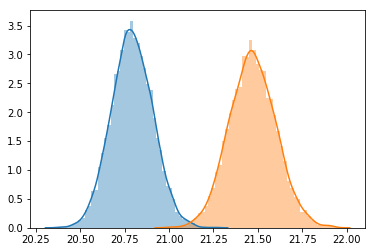

In [45]:
sns.distplot(BMI_avg_sample_all_women_1996)
sns.distplot(BMI_avg_sample_all_women_2016)

In [72]:
stats.ttest_ind(BMI_avg_sample_all_women_1996, np.random.choice(BMI_avg_sample_all_women_2016,3))

Ttest_indResult(statistic=-10.950536735258375, pvalue=9.491923920166824e-28)